In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/classification-of-animal-action/sample_submission.csv
/kaggle/input/classification-of-animal-action/x_test.csv
/kaggle/input/classification-of-animal-action/y_train.csv
/kaggle/input/classification-of-animal-action/x_train.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

#Classification
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import normalize,scale

In [3]:
x_train=pd.read_csv('../input/classification-of-animal-action/x_train.csv')
y_train=pd.read_csv('../input/classification-of-animal-action/y_train.csv')
x_test=pd.read_csv('../input/classification-of-animal-action/x_test.csv')
df = x_train.append(x_test)

## EDA

In [4]:
df.head()

,id,cat,cow,dog,horse,sheep,bounds_x,bounds_y,bounds_width,bounds_height,L_eye_v,L_eye_x,L_eye_y,R_eye_v,R_eye_x,R_eye_y,L_ear_v,L_ear_x,L_ear_y,R_ear_v,R_ear_x,R_ear_y,Nose_v,Nose_x,Nose_y,Throat_v,Throat_x,Throat_y,Tail_v,Tail_x,Tail_y,withers_v,withers_x,withers_y,L_F_elbow_v,L_F_elbow_x,L_F_elbow_y,R_F_elbow_v,R_F_elbow_x,R_F_elbow_y,L_B_elbow_v,L_B_elbow_x,L_B_elbow_y,R_B_elbow_v,R_B_elbow_x,R_B_elbow_y,L_F_knee_v,L_F_knee_x,L_F_knee_y,R_F_knee_v,R_F_knee_x,R_F_knee_y,L_B_knee_v,L_B_knee_x,L_B_knee_y,R_B_knee_v,R_B_knee_x,R_B_knee_y,L_F_paw_v,L_F_paw_x,L_F_paw_y,R_F_paw_v,R_F_paw_x,R_F_paw_y,L_B_paw_v,L_B_paw_x,L_B_paw_y,R_B_paw_v,R_B_paw_x,R_B_paw_y
0,265,0,1,0,0,0,37,16,240,170,0,0,0,1,270,145,0,0,0,1,262,129,1,269,178,1,224,135,1,49,21,1,198,30,0,0,0,1,180,101,0,0,0,1,62,82,1,197,142,1,161,139,1,75,138,1,49,127,1,208,167,1,161,168,1,94,173,1,55,177
1,676,0,0,0,1,0,43,8,208,236,0,0,0,1,217,43,1,206,18,1,212,22,1,240,67,1,202,82,1,92,85,1,158,74,1,168,150,1,188,135,1,86,138,1,122,143,1,167,185,1,205,177,1,79,185,1,113,185,1,167,213,1,193,209,1,77,232,1,115,233
2,441,0,0,1,0,0,65,0,234,222,1,180,67,1,125,63,1,222,56,1,109,47,1,126,95,1,153,191,1,153,191,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,328,0,1,0,0,0,15,8,272,178,0,0,0,1,251,25,0,0,0,1,231,17,1,282,39,1,246,56,1,27,44,1,168,33,0,0,0,1,195,102,0,0,0,1,52,106,1,176,145,1,190,149,0,0,0,1,40,139,1,169,171,1,190,172,1,52,176,1,35,178
4,102,1,0,0,0,0,2,1,148,146,1,135,68,1,108,70,1,142,35,1,91,36,1,124,85,1,126,104,0,0,0,0,0,0,0,0,0,1,90,106,1,46,125,1,43,103,0,0,0,1,73,115,1,24,125,1,24,107,1,129,130,1,68,131,1,3,128,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 967 entries, 0 to 290
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   id             967 non-null    int64
 1   cat            967 non-null    int64
 2   cow            967 non-null    int64
 3   dog            967 non-null    int64
 4   horse          967 non-null    int64
 5   sheep          967 non-null    int64
 6   bounds_x       967 non-null    int64
 7   bounds_y       967 non-null    int64
 8   bounds_width   967 non-null    int64
 9   bounds_height  967 non-null    int64
 10  L_eye_v        967 non-null    int64
 11  L_eye_x        967 non-null    int64
 12  L_eye_y        967 non-null    int64
 13  R_eye_v        967 non-null    int64
 14  R_eye_x        967 non-null    int64
 15  R_eye_y        967 non-null    int64
 16  L_ear_v        967 non-null    int64
 17  L_ear_x        967 non-null    int64
 18  L_ear_y        967 non-null    int64
 19  R_ear_v 

In [6]:
df.isnull().mean()[df.isnull().mean()>0] # NaN yok

Series([], dtype: float64)

In [7]:
df.isnull().mean()[df.isnull().mean()>0]

Series([], dtype: float64)

<AxesSubplot:>

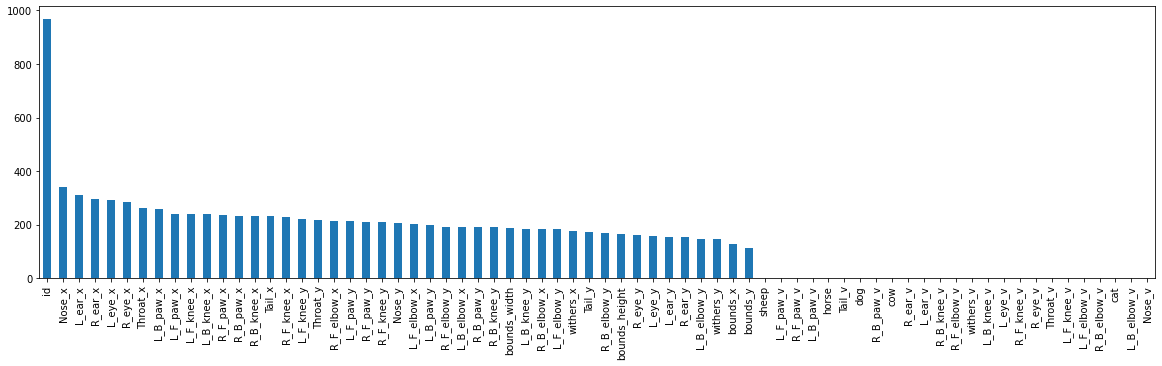

In [8]:
plt.figure(figsize=(20,5))
df.nunique().sort_values(ascending=False).plot.bar()

In [9]:
obj_cols = df.nunique()[df.nunique()<10].index.to_list()

In [10]:
df.loc[:,obj_cols] = df[obj_cols].astype(object)

## Training and Prediction

In [11]:
df_dummies = pd.get_dummies(df.drop(columns='id'), drop_first=True)
df_train = df_dummies[:x_train.shape[0]]
df_test = df_dummies[x_train.shape[0]:]

In [12]:
def classification_(X,y): 
    lgbc=LGBMClassifier()
    xgbc=XGBClassifier()
    g=GaussianNB()
    b=BernoulliNB()
    k=KNeighborsClassifier()
    svc=SVC()
    d=DecisionTreeClassifier()
    log=LogisticRegression() # binary classification
    gbc=GradientBoostingClassifier()
    mn=MultinomialNB()
    rf=RandomForestClassifier()
    ab=AdaBoostClassifier()
    
    algos=[lgbc, xgbc,g,b,k,svc,d,log,gbc,mn,rf,ab]
    algos_name=['LGBMClassifier','XGBClassifier','Gaussian','Bernoulli','KNeighbors','SVC','DecisionTree','LogisticReg','GradientBoosting','MultinominalNB','RandomForest','AdaBoost']

    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=101)

    accuracy = []
    precision = []
    recall = []
    f1 = []
   
    result=pd.DataFrame(columns=['AccuracyScore','PrecisionScore','RecallScore','f1_Score'],index=algos_name)
    
    for i in algos:
        predict=i.fit(X_train,y_train).predict(X_test)
        accuracy.append(accuracy_score(y_test,predict))
        precision.append(precision_score(y_test,predict,average = 'weighted')) # 3 unun , 'weighted' bulundurmasi gerekebilir
        recall.append(recall_score(y_test,predict, average = 'weighted'))
        f1.append(f1_score(y_test,predict, average = 'weighted'))
      
    result.AccuracyScore=accuracy
    result.PrecisionScore=precision
    result.RecallScore=recall
    result.f1_Score=f1
    
    return result.sort_values('AccuracyScore',ascending=False)

In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit_transform([str(y) for y in y_train])


array([1, 3, 6, 5, 2, 0, 4])

In [14]:
cols = y_train.drop(columns='id').columns.to_list()

In [15]:
for i in cols:
    y_train.loc[y_train[i]==1, 'labels'] = i

In [16]:
y_train['label']=y_train.labels.map({'nothing':0, 'stand':1, 'sit':2,'lie':3, 'go':4, 'run':5})

In [17]:
y_train

,id,nothing,stand,sit,lie,go,run,labels,label
0,265,0,0,0,0,1,0,go,4
1,676,0,0,0,0,1,0,go,4
2,441,1,0,0,0,0,0,nothing,0
3,328,0,1,0,0,0,0,stand,1
4,102,0,0,0,1,0,0,lie,3
...,...,...,...,...,...,...,...,...,...
671,356,0,1,0,0,0,0,stand,1
672,960,0,1,0,0,0,0,stand,1
673,812,0,1,0,0,0,0,stand,1
674,132,0,0,0,1,0,0,lie,3


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_train=scaler.fit_transform(df_train)
df_test=scaler.transform(df_test)

In [19]:
classification_(df_train, y_train.label)

,AccuracyScore,PrecisionScore,RecallScore,f1_Score
LGBMClassifier,0.735294,0.728520,0.735294,0.721546
GradientBoosting,0.720588,0.694367,0.720588,0.685180
XGBClassifier,0.705882,0.722831,0.705882,0.696826
RandomForest,0.705882,0.646947,0.705882,0.648757
LogisticReg,0.669118,0.625474,0.669118,0.623559
SVC,0.654412,0.593219,0.654412,0.580316
KNeighbors,0.647059,0.674949,0.647059,0.595117
MultinominalNB,0.595588,0.533009,0.595588,0.555996
DecisionTree,0.551471,0.563760,0.551471,0.555998
Bernoulli,0.404412,0.618666,0.404412,0.425180


In [20]:
lbmc=LGBMClassifier()
predict = lbmc.fit(df_train, y_train.label).predict(df_test)
predict

array([4, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 4, 1, 0, 3, 1, 1, 1, 1, 0, 1, 1, 0,
       2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 4, 1, 1, 1, 3, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 4, 2, 1, 1, 5, 1, 1, 1,
       1, 5, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 4, 1, 1, 1, 0, 0,
       1, 1, 1, 2, 1, 5, 4, 2, 1, 1, 0, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 0,
       1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 5, 4, 1, 1, 1,
       1, 5, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 3, 3, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 3, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 3, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 5, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 5, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 2, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3,
       1, 1, 1, 1, 3])

In [21]:
submission = pd.read_csv('../input/classification-of-animal-action/sample_submission.csv')
submission['label'] = predict
submission.to_csv('submission.csv', index=False)
submission.head()

,id,label
0,582,4
1,42,1
2,148,1
3,737,1
4,213,0
